### Introduction
Our final project consist of four datasets, the 2019 regular season MLB pitching stats and hitting stats (This is our training data). We also bring in the current 2020 regular season MLB pitching and hitting stats (this is our testing data).

### About the data
- four dataset: 2019 MLB hitting and pitching, 2020 MLB hitting and pitching
- All datasets were pulled from [baseball-reference.com](https://www.baseball-reference.com/)

## Project Overview

In this project, we will build a model to predict weather or not a team has good pitchers or not based ERA, HR/9, WHIP. To accomplish this I will compare 3 classifier models:

- Logistical Regression
- Decision Tree
- Random Forest

Each model will be evaluated based on R2 score

#### Why use R2 score?

The R2 score enables us to take into account false negatives and false positives when calculating the accuracy of a model. If we use the generic accuracy_score method, false positives would be considered as correct predictions which is something that is inaccurate and would mislead me into thinking my model is more accurate than it is.

In [1]:
# Importing required libraries.
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Read-in 2019 Pitching Data
df = pd.read_csv('./mlb-hitting-2019.csv')

df.head()

,Tm,#Bat,BatAge,R/G,G,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,LOB
0,ARI,45,28.7,5.02,162,6315,5633,813,1419,288,40,220,778,88,14,540,1360,0.252,0.323,0.434,0.757,94,2447,120,70,31,40,36,1119
1,ATL,50,28.0,5.28,162,6302,5560,855,1432,277,29,249,824,89,28,619,1467,0.258,0.336,0.452,0.789,99,2514,104,60,25,35,39,1138
2,BAL,58,26.5,4.50,162,6189,5596,729,1379,252,25,213,698,84,30,462,1435,0.246,0.310,0.415,0.725,91,2320,111,71,22,37,8,1063
3,BOS,47,27.3,5.56,162,6475,5770,901,1554,345,27,245,857,68,30,590,1382,0.269,0.340,0.466,0.806,106,2688,127,49,20,44,36,1170
4,CHC,52,27.7,5.02,162,6195,5461,814,1378,270,26,256,783,45,24,581,1460,0.252,0.331,0.452,0.783,101,2468,127,83,30,39,33,1071


In [3]:
#Describe Data
df.describe()

,#Bat,BatAge,R/G,G,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,LOB
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.00000,32.000000,32.000000,32.000000,32.000000
mean,94.500000,27.934375,4.831250,308.687500,11851.656250,10589.281250,1491.125000,2671.218750,542.062500,49.875000,430.562500,1427.843750,144.875000,52.8750,1010.000000,2721.031250,0.252156,0.322469,0.434687,0.757281,96.906250,4604.750000,220.031250,126.06250,49.312500,73.062500,47.843750,2082.906250
std,240.113145,0.820153,0.534867,830.154802,31873.160037,28478.135104,4011.084535,7184.179158,1458.055973,134.329818,1158.612183,3840.861169,390.426628,142.3881,2717.086556,7318.535159,0.010488,0.013397,0.028714,0.041455,10.318663,12384.925181,591.935997,339.31049,133.314432,196.609477,129.158345,5601.744966
min,43.000000,25.900000,3.610000,161.000000,6019.000000,5391.000000,582.000000,1281.000000,224.000000,17.000000,146.000000,556.000000,28.000000,10.0000,378.000000,1166.000000,0.236000,0.294000,0.375000,0.673000,79.000000,2065.000000,83.000000,43.00000,4.000000,27.000000,7.000000,1003.000000
25%,48.500000,27.600000,4.495000,162.000000,6156.250000,5499.000000,728.250000,1349.500000,269.500000,21.000000,214.500000,697.750000,56.750000,21.7500,491.250000,1359.000000,0.245750,0.314750,0.418750,0.735250,90.500000,2314.500000,109.500000,56.50000,14.000000,34.000000,17.000000,1069.000000
50%,51.500000,27.850000,4.765000,162.000000,6236.500000,5552.000000,771.500000,1381.500000,287.000000,26.000000,225.000000,743.000000,70.500000,28.0000,541.000000,1435.500000,0.251000,0.323000,0.431500,0.756500,95.500000,2401.500000,113.500000,66.50000,25.500000,38.500000,25.000000,1087.000000
75%,54.500000,28.475000,5.167500,162.000000,6288.500000,5615.750000,847.500000,1448.750000,300.500000,28.250000,249.250000,808.250000,95.750000,32.0000,584.500000,1505.750000,0.258750,0.329500,0.452000,0.782250,101.250000,2507.250000,121.750000,77.25000,36.250000,42.000000,34.500000,1125.750000
max,1410.000000,29.900000,5.820000,4858.000000,186518.000000,166651.000000,23467.000000,42039.000000,8531.000000,785.000000,6776.000000,22471.000000,2280.000000,832.0000,15895.000000,42823.000000,0.274000,0.352000,0.495000,0.848000,118.000000,72468.000000,3463.000000,1984.00000,776.000000,1150.000000,753.000000,32780.000000


In [4]:
#Get info on the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Tm      31 non-null     object 
 1   #Bat    32 non-null     int64  
 2   BatAge  32 non-null     float64
 3   R/G     32 non-null     float64
 4   G       32 non-null     int64  
 5   PA      32 non-null     int64  
 6   AB      32 non-null     int64  
 7   R       32 non-null     int64  
 8   H       32 non-null     int64  
 9   2B      32 non-null     int64  
 10  3B      32 non-null     int64  
 11  HR      32 non-null     int64  
 12  RBI     32 non-null     int64  
 13  SB      32 non-null     int64  
 14  CS      32 non-null     int64  
 15  BB      32 non-null     int64  
 16  SO      32 non-null     int64  
 17  BA      32 non-null     float64
 18  OBP     32 non-null     float64
 19  SLG     32 non-null     float64
 20  OPS     32 non-null     float64
 21  OPS+    32 non-null     int64  
 22  TB  

In [5]:
#Convert Tm into a category
df.Tm = df.Tm.astype('category')

#### I want to convert Tm to a category because I don't want to have to deal with objects later on in my model building


## I want to take a look at some distrobution plots on the dataset to know if we need to normalize any data.

In [6]:
#Creating a df with all quantitative features
pair_df = df.drop('Tm', axis=1)

In [7]:
# Correlation Matrix of quantitative features
c = pair_df.corr()

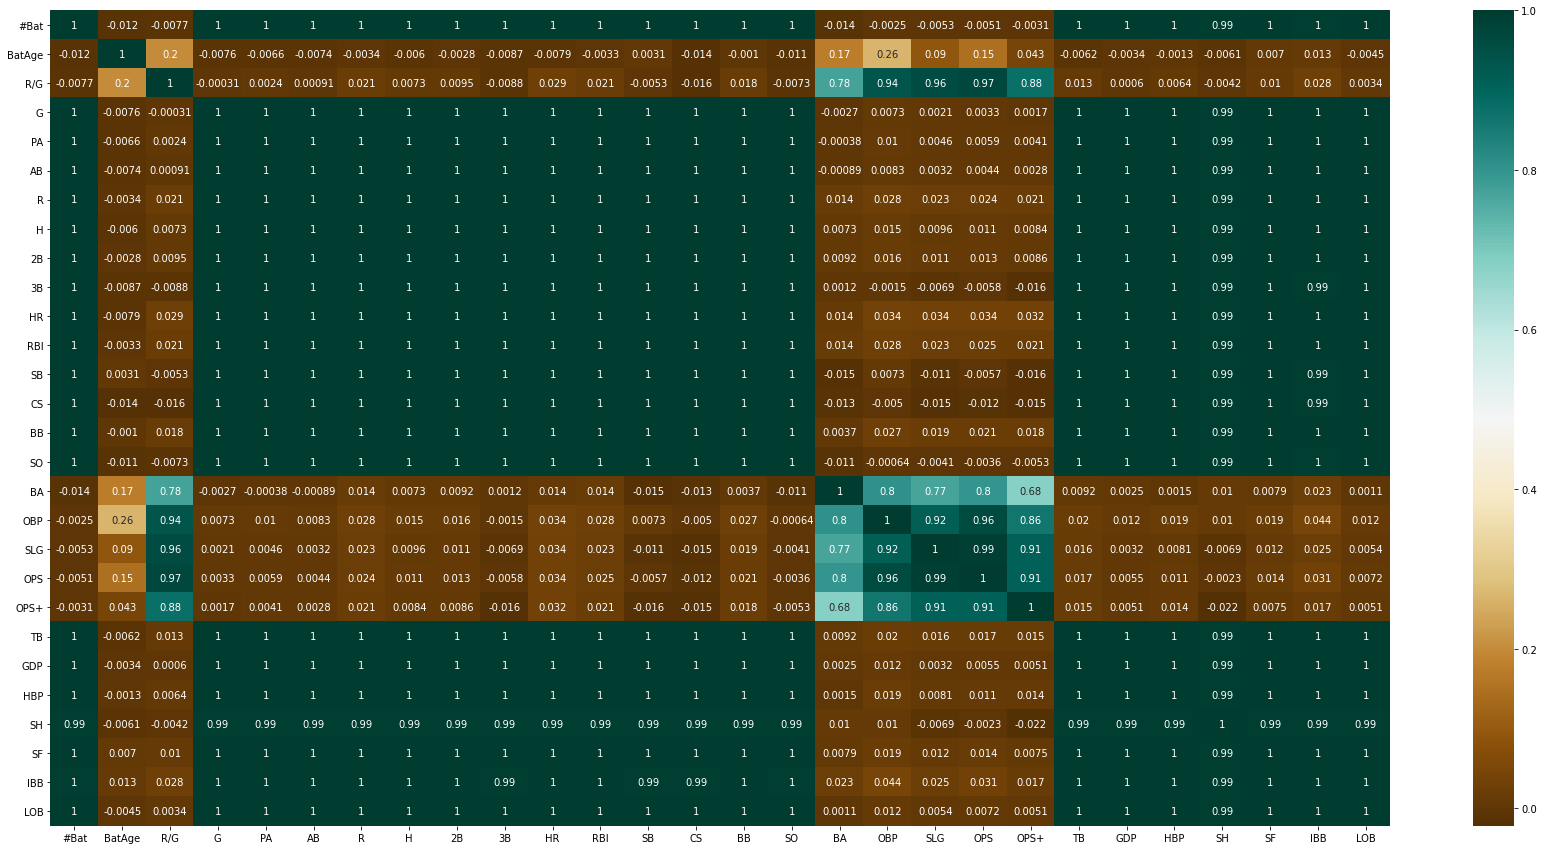

In [8]:
#visualizing the correlation matrix
plt.figure(figsize=(30,15))
sns.heatmap(c,cmap="BrBG", annot=True)

In [9]:
# List of Features that will help train the model
features = ['OPS','SLG','OBP','R/G']

## Distrobution plots for most relevant features

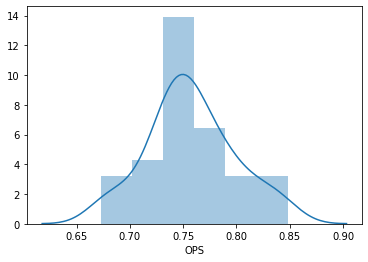

In [10]:
#OPS Distrobution
sns.distplot(pair_df.OPS)

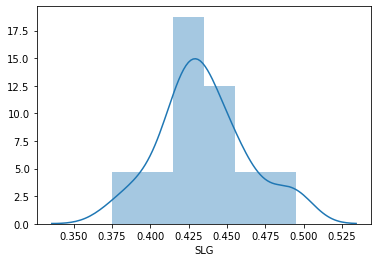

In [11]:
#SLG Distrobution
sns.distplot(pair_df.SLG)

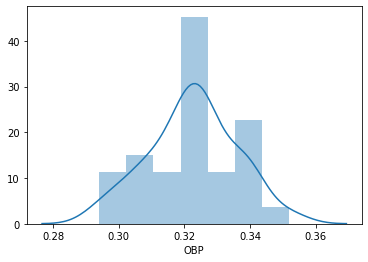

In [12]:
#OBP Distrobution
sns.distplot(pair_df.OBP)

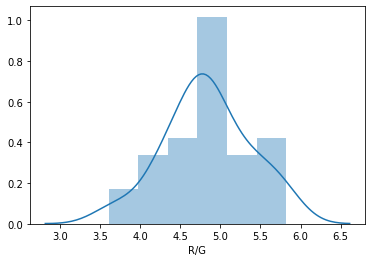

In [13]:
#R/G Distrobution
sns.distplot(pair_df['R/G'])

In [28]:
#Required Imports
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

# Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor

## Creating X, y and splitting up training and testing data

In [15]:
X = pair_df[features]
y = pair_df.BA

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .20)

## LinearRegression

In [30]:
# Logistical Regression Pipeline
lr = Pipeline(steps=[('LinReg', LinearRegression())])
lr.fit(X_train, y_train)

lr_preds = lr.predict(X_test)
r2 = r2_score(y_test, lr_preds)
mse = mean_squared_error(y_test, lr_preds)
print(f"r2_score: {r2}, MSE score: {mse}")

r2_score: 0.7661839611912791, MSE score: 1.0984582068115786e-05


## DecisionTreeRegressor

In [18]:
#Hyperparameter optimization for DecisionTreeRegressor
parameters = {
    'max_depth':[15,20,30],
}
dtc = Pipeline(steps=[('CV',GridSearchCV(DecisionTreeRegressor(), parameters, cv = 5))])
dtc.fit(X_train, y_train)
dtc.named_steps['CV'].best_params_

{'max_depth': 15}

In [31]:
# DecisionTrees pipeline 
dt = Pipeline(steps=[('LogReg', DecisionTreeRegressor(max_depth=15))])
dt.fit(X_train,y_train)
dt_preds = dt.predict(X_test)
r2_2 = r2_score(y_test, dt_preds)
mse_2 = mean_squared_error(y_test, dt_preds)
print(f"r2_score: {r2_2}, MSE score: {mse_2}")

r2_score: -0.32580364900087244, MSE score: 6.228571428571424e-05


## RandomForestRegressor

In [20]:
# Hyperparameter optimization of RandomForestRegressor
parameters = {
    'max_depth':[6,12,15,20],
    'n_estimators':[20,30]
}
rfc = Pipeline([('CV',GridSearchCV(RandomForestRegressor(), parameters, cv = 5))])
rfc.fit(X_train, y_train)
rfc.named_steps['CV'].best_params_

{'max_depth': 6, 'n_estimators': 20}

In [32]:
# RandomForestTrees pipeline 
rf = Pipeline(steps=[('LogReg', RandomForestRegressor(max_depth=6,n_estimators=20))])
rf.fit(X_train,y_train)
rf_preds = rf.predict(X_test)
r2_3 = r2_score(y_test,rf_preds)
mse_3 = mean_squared_error(y_test, rf_preds)
print(f"r2_score: {r2_3}, MSE score: {mse_3}")

r2_score: 0.7292555386620301, MSE score: 1.2719464285714378e-05


## GradientBoostingRegressor

In [36]:
from sklearn import ensemble
# Hyperparameter optimization of GradientBoostedRegressor
parameters = {
    'max_depth':[4,6,12,15,20],
    'n_estimators':[20,30],
    'min_samples_split': [5, 10, 15],
    'learning_rate': [0.01, 0.1, 1.0],
    'loss': ['ls']
}
gbr = Pipeline([('CV',GridSearchCV(ensemble.GradientBoostingRegressor(), parameters, cv = 5))])
gbr.fit(X_train, y_train)
gbr.named_steps['CV'].best_params_

{'learning_rate': 0.01,
 'loss': 'ls',
 'max_depth': 4,
 'min_samples_split': 10,
 'n_estimators': 30}

In [39]:
parameters_final = {
    'learning_rate': 0.01,
    'loss': 'ls',
    'max_depth': 4,
    'min_samples_split': 10,
    'n_estimators': 30
}
gb = Pipeline(steps=[('GbReg', ensemble.GradientBoostingRegressor(learning_rate=0.01, loss='ls', max_depth=4, min_samples_split=10, n_estimators=30))])
gb.fit(X_train, y_train)
gb_preds = gb.predict(X_test)
r2_4 = r2_score(y_test,gb_preds)
mse_4 = mean_squared_error(y_test, gb_preds)
print(f"r2_score: {r2_4}, MSE score: {mse_4}")

r2_score: 0.30519076357613906, MSE score: 3.264185433158617e-05


## Final prediction using best fit model on the entire dataset

In [33]:
y_pred = lr.predict(X)
r2_final = r2_score(y, y_pred)
mse_final = mean_squared_error(y, y_pred)
print(f"r2_score: {r2_final}, MSE score: {mse_final}")

r2_score: 0.6547271417704743, MSE score: 3.6795499218763126e-05


In [23]:
predictions_df = pd.DataFrame({'Real BA':pair_df.BA, 'Predicted BA':y_pred})

In [24]:
predictions_df.head()

,Real BA,Predicted BA
0,0.252,0.252609
1,0.258,0.259740
2,0.246,0.245006
3,0.269,0.262923
4,0.252,0.257534


## Exporting Model for later use 

In [26]:
# Exporting Model for later use
import pickle

filename = 'finalized_model_hitting.sav'
pickle.dump(lr, open(filename, 'wb'))